# **California Housing Prices**
## **Median house prices for California districts derived from the 1990 census.**

**Number of Instances:**
20640

**Number of Attributes:**
8 numeric, predictive attributes and the target

**Attribute Information:**

**MedInc** median income in block

**HouseAge** median house age in block

**AveRooms** average number of rooms

**AveBedrms** average number of bedrooms

**Population** block population

**AveOccup** average house occupancy

**Latitude** house block latitude

**Longitude** house block longitude

**Target**

The target variable is the **median house** value in units of 100,000 for California districts.

**DataSource**: https://www.kaggle.com/camnugent/california-housing-prices

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras 

In [5]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

In [8]:
print(df.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data,df.target, random_state=50)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, random_state=50)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test  = scaler.fit_transform(X_test)

In [13]:
np.random.seed(50)
tf.random.set_seed(50)

In [18]:
X_train.shape

(11610, 8)

In [22]:
model = keras.models.Sequential([
	keras.layers.Dense(20, activation='relu', input_shape=[8]),
	keras.layers.Dense(20, activation='relu'),
  keras.layers.Dense(1)
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='sgd', metrics=['mae'], loss='mean_squared_error')

In [25]:
model_history = model.fit(X_train, y_train, epochs= 20, validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3152 - mae: 0.3953 - val_loss: 0.4184 - val_mae: 0.4511
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3154 - mae: 0.3958 - val_loss: 0.4415 - val_mae: 0.4506
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3186 - mae: 0.3966 - val_loss: 0.4472 - val_mae: 0.4538
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3141 - mae: 0.3952 - val_loss: 0.4310 - val_mae: 0.4474
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3106 - mae: 0.3919 - val_loss: 0.4313 - val_mae: 0.4527
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3069 - mae: 0.3904 - val_loss: 0.4480 - val_mae: 0.4498
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3069 - mae: 0.3892 - val_loss: 0.4207 - val_mae: 0.4455
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [26]:
model_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3843 - mae: 0.4287


In [27]:
model_history.history

{'loss': [0.31521281599998474,
  0.3153899908065796,
  0.3186446726322174,
  0.31407099962234497,
  0.3106101155281067,
  0.3068512976169586,
  0.3068977892398834,
  0.3073701858520508,
  0.30978983640670776,
  0.30663371086120605,
  0.3049464523792267,
  0.30223095417022705,
  0.29965880513191223,
  0.2993777096271515,
  0.2977375388145447,
  0.2971920967102051,
  0.29556238651275635,
  0.2953401803970337,
  0.29349324107170105,
  0.2931857705116272],
 'mae': [0.395347535610199,
  0.39575889706611633,
  0.3966210186481476,
  0.3951861560344696,
  0.3919057548046112,
  0.39042988419532776,
  0.3892085552215576,
  0.38995394110679626,
  0.3900908827781677,
  0.38942497968673706,
  0.3868248462677002,
  0.38641855120658875,
  0.3851747214794159,
  0.3844737112522125,
  0.3829791843891144,
  0.38311681151390076,
  0.3814605474472046,
  0.3801974058151245,
  0.380367636680603,
  0.3793875575065613],
 'val_loss': [0.4184201955795288,
  0.4415075480937958,
  0.44722679257392883,
  0.43104106

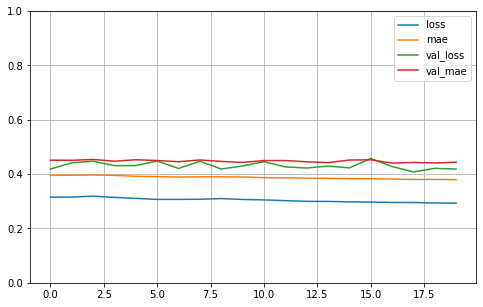

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
X_new = X_test[:3]

In [32]:
y_pred = model.predict(X_new)
print(y_pred)

[[1.698199 ]
 [3.0037627]
 [1.9118979]]
